## Zahara Vazir - 18417696 
## COMP30850 - Assignment 2 

### For this assignment I have chosen the technology dataset. 

In [1]:
import json, itertools
import networkx as nx #NetworkX
import pandas as pd #allows us to use data structures and analysis tools in Python
import matplotlib
import matplotlib.pyplot as plt #allows us to create visualisations 
from collections import Counter
from networkx.algorithms import bipartite
%matplotlib inline 

## Follower Network :

In [2]:
df1 = pd.read_csv("friendships.csv", delimiter='\t', header = None) #loading the friendships.csv file. gives us a list of the users and a list of their followers 
df1

,0,1
0,arstechnica,bbctech
1,cnntech,arstechnica
2,forbestech,arstechnica
3,huffposttech,arstechnica
4,mashable,arstechnica
...,...,...
198,techrepublic,zdnet
199,telegraphtech,wired
200,usatodaytech,verge
201,usatodaytech,wsjtech


In [3]:
g1 = nx.DiGraph() #creating a directed graph 
#using iterrows() to iterate over the pandas dataframe rows in the form of (index, series). returns a tuple. 
for index, row in df1.iterrows():
    g1.add_edge(row[0], row[1]) #adds edge between the user and their follower 

For the follower network, I'm creating a directed network. This is because in twitter, a user who has an account has followers, but that doesnt mean that, that user follows back all of their followers. This means that when identifying who follows who on twitter, you would natrually create a directed network. User X following User Y doesnt mean that User Y follows User X back.  

In [4]:
for edge in g1.edges(data=True): #printing out edges - user and their follower 
    print(edge)

('arstechnica', 'bbctech', {})
('arstechnica', 'techmeme', {})
('arstechnica', 'technology', {})
('arstechnica', 'wired', {})
('cnntech', 'arstechnica', {})
('cnntech', 'cnet', {})
('cnntech', 'cnetnews', {})
('cnntech', 'gigaom', {})
('cnntech', 'mashable', {})
('cnntech', 'rww', {})
('cnntech', 'techcrunch', {})
('cnntech', 'techmeme', {})
('cnntech', 'thenextweb', {})
('cnntech', 'usatodaytech', {})
('cnntech', 'verge', {})
('cnntech', 'wired', {})
('forbestech', 'arstechnica', {})
('forbestech', 'bbctech', {})
('forbestech', 'gigaom', {})
('forbestech', 'gizmodo', {})
('forbestech', 'guardiantech', {})
('forbestech', 'mashable', {})
('forbestech', 'rww', {})
('forbestech', 'techcrunch', {})
('forbestech', 'techmeme', {})
('forbestech', 'thenextweb', {})
('forbestech', 'usatodaytech', {})
('forbestech', 'venturebeat', {})
('forbestech', 'wired', {})
('forbestech', 'zdnet', {})
('huffposttech', 'arstechnica', {})
('huffposttech', 'cnetnews', {})
('huffposttech', 'cnntech', {})
('huff

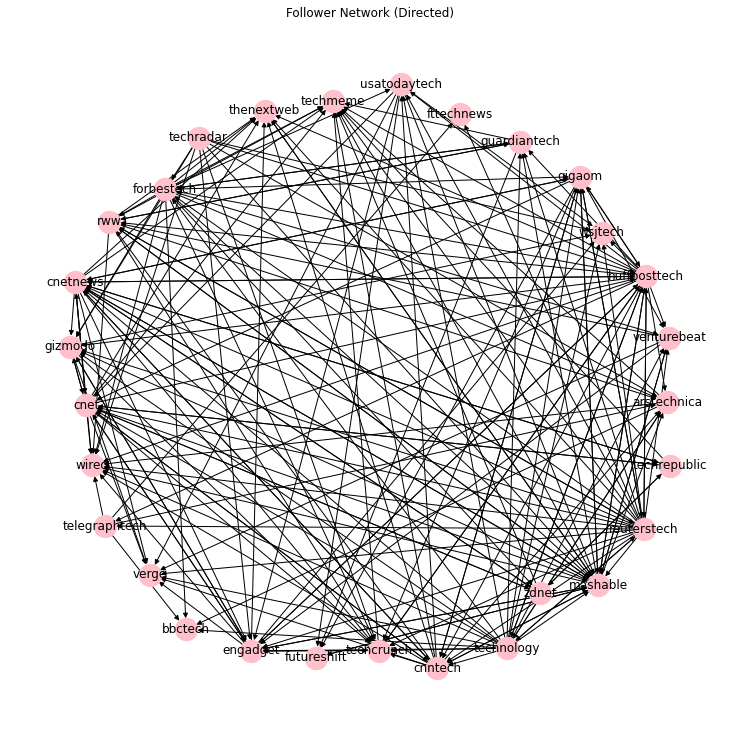

In [5]:
plt.figure(figsize=(13,13)) #creating the directed graph. nodes are users 
pos = nx.spring_layout(g1, k = 7)
nx.draw_networkx(g1, pos, with_labels = True, node_size = 500, node_color = "pink", label_size = 5)
plt.title("Follower Network (Directed)")
plt.axis("off")
plt.show()

In [6]:
print("Nodes", g1.number_of_nodes()) #number of nodes 
print("Edges", g1.number_of_edges()) #number of edges 
print("Density", nx.density(g1)) #density of the graph 
print("Reciprocity", nx.reciprocity(g1) ) #reciprocity 
print("Strongly Connected?:", nx.is_strongly_connected(g1))
print("Components", nx.number_strongly_connected_components(g1))
print("Is Follower network directed?: ", nx.is_directed(g1)) #checks if the graph is directed 

Nodes 29
Edges 203
Density 0.25
Reciprocity 0.3448275862068966
Strongly Connected?: False
Components 8
Is Follower network directed?:  True


From the above, we can see that the follower network has 29 nodes which represent the users and 203 edges. 
Next, we are looking at the network density. The density of this network is 0.25. This refers to the connections between the nodes. The density of a network refers to the potential edges between nodes in a network that exist as actual edges. A network with a high density is said to be dense and a network with a low desnity is said to be sparse. 
The reciprocity refers to the reciprocal edge in the directed network. This is an edge that goes in both directions. The reciprocal edges in a Twitter follower network may indicate a stronger relationship between two users. As we can see from the figure, it is obvious to us that there are reciprocal esges in the network. 
This is not a strongly connected network as there are 8 components to it. Not every node is reachable from every other node. 
Lastly, we check if it is a directed network and it returns true. 

In [7]:
in_deg1 = pd.Series(dict( g1.in_degree() ), name="in-degree") #prints the in-degrees for the users
pd.DataFrame(in_deg1).sort_values(by="in-degree", ascending=False).head(10) #prints the top 10 users with the highest in-degree 

,in-degree
mashable,15
wired,13
techmeme,13
techcrunch,12
engadget,11
cnet,10
verge,9
thenextweb,9
huffposttech,9
gizmodo,9


This above dataframe shows us the users with the 10 highest in-degree values. The in-degree refers to the number of incoming edges for each node. We can see from the table that for the user mashable, 15 users follow mashable and therefore this user has 15 edges coming towards it. This indicates that the user mashable is quite perstige due to its number of incoming edges, as it has the highest in-degree out of all the other users. Finding the in-degree values also helps us tp find the influential nodes in the network. 

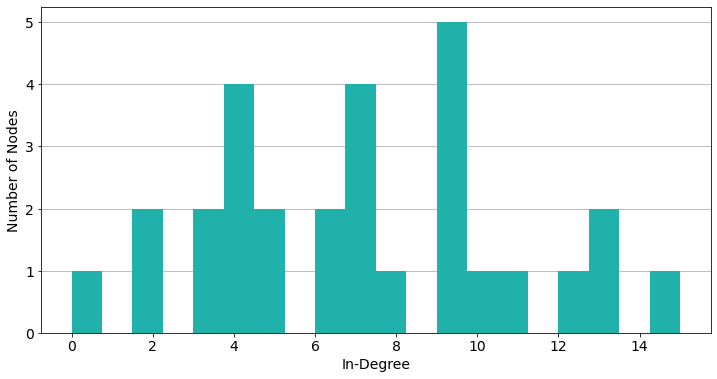

In [8]:
ax = in_deg1.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="lightseagreen", bins=20, zorder=3)
ax.yaxis.grid()
ax.set_ylabel("Number of Nodes", fontsize=14)
ax.set_xlabel("In-Degree", fontsize=14);

This histogram shows us what the in-degree values for the nodes. We can see that the most common in-degree values are from 6-8 and 9-11. There are 7 nodes which have an in-degree between 6-8 and there are 7 nodes with an in-degree between 9-11. There is only one node with an indegree of 1 and one node with an in-degree of 15. The highest in-degree value is 15, which we can see from the graph. 

In [9]:
between1 = pd.Series(dict( nx.betweenness_centrality(g1) ), name="betweenness") #getting the betweenness centrality 
pd.DataFrame(between1).sort_values(by="betweenness", ascending=False).head(10)

,betweenness
mashable,0.145349
huffposttech,0.133683
cnet,0.069852
technology,0.061660
cnetnews,0.060769
arstechnica,0.053373
reuterstech,0.049145
engadget,0.035943
forbestech,0.031066
rww,0.027140


Here I have caluclate the betweeness centrality for the nodes. Betweenness centrality recognises strategic linkages or "bridging nodes" in a network. These are nodes that occur on many shortest paths between other nodes in the network. From the above table, it is obvious that **Mashable** has the highest betweenness centrality as it is 0.145349. This is the highest betweenness compared to the other nodes. This indicates that Mashable is an important and powerful node in the network as nodes with a high betweenness measure often have considerable influence in a network, as they have control over information passing between others. The node Mashable is also on the shortest paths of many of the nodes in the network. 

It is clear that Mashable is an influential and important node in the network as it has the higest in-degree and betweeness. 

In [10]:
# getting reciprocity for all unique pairs 
for pair in itertools.combinations(g1.nodes(), r=2):
    if g1.has_edge( pair[0], pair[1] ) and g1.has_edge( pair[1], pair[0] ):
        print( "%s <--> %s" % pair )

arstechnica <--> technology
cnntech <--> mashable
cnntech <--> cnetnews
cnntech <--> cnet
cnntech <--> gigaom
forbestech <--> guardiantech
huffposttech <--> mashable
huffposttech <--> technology
huffposttech <--> cnetnews
huffposttech <--> engadget
huffposttech <--> gigaom
huffposttech <--> reuterstech
huffposttech <--> techcrunch
mashable <--> rww
mashable <--> cnetnews
mashable <--> engadget
mashable <--> gigaom
mashable <--> thenextweb
mashable <--> venturebeat
mashable <--> futureshift
rww <--> reuterstech
rww <--> guardiantech
technology <--> reuterstech
cnetnews <--> cnet
cnetnews <--> gigaom
cnetnews <--> techrepublic
cnetnews <--> zdnet
cnet <--> engadget
cnet <--> gizmodo
cnet <--> techrepublic
cnet <--> zdnet
engadget <--> gizmodo
engadget <--> techcrunch
gigaom <--> reuterstech
techrepublic <--> zdnet


Here we are finding all of the reciprocal edges in the network. This is an edge that goes in both directions. We are finding this in order to convert the directed network into an undirected network by getting rid of all of the other edges which are not reciprocal. 

In [11]:
#creating a new undirected version of the network
undirg1 = g1.to_undirected(reciprocal=True)
undirg1.number_of_nodes(), undirg1.number_of_edges()

(29, 35)

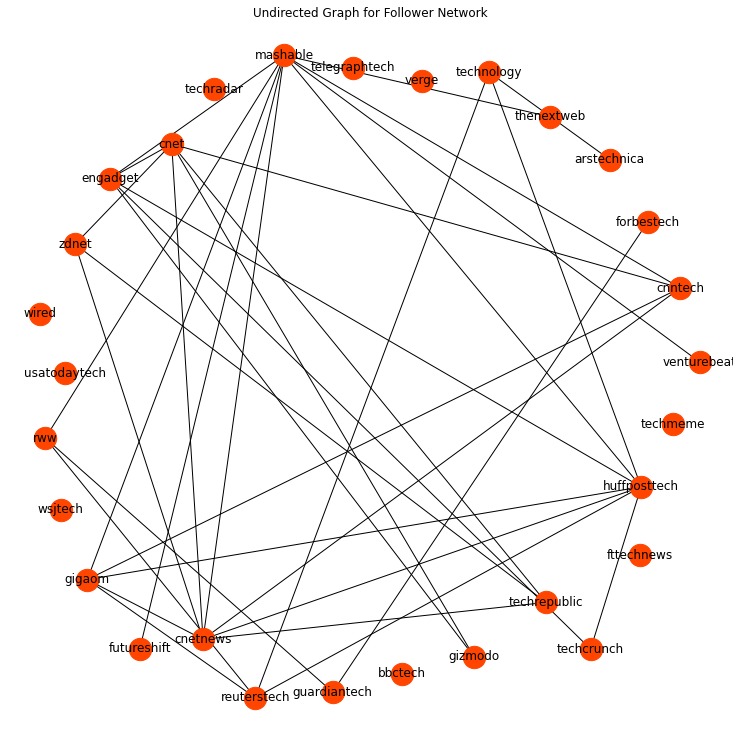

In [12]:
plt.figure(figsize=(13,13)) #printing out unidrected network 
pos = nx.spring_layout(undirg1, k = 100)
nx.draw_networkx(undirg1, pos, with_labels = True, node_size = 500, node_color = "orangered", label_size = 5)
plt.title("Undirected Graph for Follower Network")
plt.axis("off")
plt.show()

In [13]:
print("Nodes", undirg1.number_of_nodes()) #number of nodes 
print("Edges", undirg1.number_of_edges()) #number of edges 
print("Density", nx.density(undirg1)) #density of the graph 
print("Connected?:", nx.is_connected(undirg1))
print("Components", nx.number_connected_components(undirg1))
print("Is Follower network directed?: ", nx.is_directed(undirg1)) #checks if the graph is directed 

Nodes 29
Edges 35
Density 0.08620689655172414
Connected?: False
Components 10
Is Follower network directed?:  False


This network tells us when user X follows user Y back. It shows us an edge when the two users follow each other back. The number of nodes is 29 and edges is 35. The edges are less compared to previous graph, as we got rid of edges which were not reciprocal. The density indicates to the connections between the nodes. The density is lower compared to previous graph. This graph is not connected as every node is not reachable from every other node and there are 10 components that make up this network. We know that this is not a directed graph as it returned False. 

## Reply Network : 

In [14]:
fin = open( "tweets.jsonl", "r" )
tweets = []
# process the file line-by-line
for line in fin.readlines():
    line = line.strip()
    # each line contains a JSON document, representing a single tweet
    tweet = json.loads(line)
    tweets.append(tweet)
fin.close()
print("Read %d tweets" % len(tweets))

Read 14500 tweets


In [15]:
df2 = pd.DataFrame(tweets).set_index("id") #printing the dataframe. making id the index 
df2.head(10)

,created_at,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,favorited,retweeted,possibly_sensitive,lang,extended_entities,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
id,,,,,,,,,,,,,,,,,,,,,
1349499769064976384,Wed Jan 13 23:33:12 +0000 2021,1349499769064976384,Parler CEO says the social network might never...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1352760509037211648,Fri Jan 22 23:30:13 +0000 2021,1352760509037211648,"""I got my first dose this week, and I feel gre...",False,"[0, 200]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1347347797880811523,Fri Jan 08 01:02:02 +0000 2021,1347347797880811523,Google’s Antitrust Woes Seen Helping Microsoft...,False,"[0, 138]","{'hashtags': [{'text': 'Microsoft', 'indices':...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,NaN,...,False,False,False,en,"{'media': [{'id': 1347347796396023809, 'id_str...",NaN,NaN,NaN,NaN,NaN
1351713268956618752,Wed Jan 20 02:08:51 +0000 2021,1351713268956618752,Poker isn’t just about calibrating the strengt...,False,"[0, 188]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1350246813341663233,Sat Jan 16 01:01:41 +0000 2021,1350246813341663233,FAA approves the first fully automated commerc...,False,"[0, 230]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://techmeme.com/about"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1334590499433426944,Thu Dec 03 20:09:05 +0000 2020,1334590499433426944,Our VP of Research Jon Collins examines the De...,False,"[0, 259]","{'hashtags': [{'text': 'DevOps', 'indices': [2...","<a href=""http://www.hubspot.com/"" rel=""nofollo...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1348720093874839552,Mon Jan 11 19:55:03 +0000 2021,1348720093874839552,SolarWinds malware has “curious” ties to Russi...,False,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://arstechnica.com"" rel=""nofollow...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1349507324713578497,Thu Jan 14 00:03:13 +0000 2021,1349507324713578497,"Feds asks Tesla to recall 158,000 vehicles ove...",False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1352557180097064962,Fri Jan 22 10:02:15 +0000 2021,1352557180097064962,2021 Chevrolet Colorado ZR2: Still a solid cho...,False,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://www.socialflow.com"" rel=""nofol...",NaN,None,NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df2 = df2.drop( ['possibly_sensitive', #removing unncessary columns 
        'display_text_range',
        'truncated',
        'contributors',
        'coordinates', 
        'extended_entities',
        'id_str',
        'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 
        'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', 'quoted_status',
        'source'], axis=1 )

In [17]:
df2.head(10) #printing 10 rows

,created_at,full_text,entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_screen_name,user,geo,place,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status
id,,,,,,,,,,,,,,,
1349499769064976384,Wed Jan 13 23:33:12 +0000 2021,Parler CEO says the social network might never...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 819800, 'id_str': '819800', 'name': 'CN...",None,None,7,18,False,False,en,NaN
1352760509037211648,Fri Jan 22 23:30:13 +0000 2021,"""I got my first dose this week, and I feel gre...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 30261067, 'id_str': '30261067', 'name':...",None,None,16,85,False,False,en,NaN
1347347797880811523,Fri Jan 08 01:02:02 +0000 2021,Google’s Antitrust Woes Seen Helping Microsoft...,"{'hashtags': [{'text': 'Microsoft', 'indices':...",NaN,None,None,"{'id': 4641021, 'id_str': '4641021', 'name': '...",None,None,3,2,False,False,en,NaN
1351713268956618752,Wed Jan 20 02:08:51 +0000 2021,Poker isn’t just about calibrating the strengt...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 1344951, 'id_str': '1344951', 'name': '...",None,None,48,175,False,False,en,NaN
1350246813341663233,Sat Jan 16 01:01:41 +0000 2021,FAA approves the first fully automated commerc...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 817386, 'id_str': '817386', 'name': 'Te...",None,None,5,12,False,False,en,NaN
1334590499433426944,Thu Dec 03 20:09:05 +0000 2020,Our VP of Research Jon Collins examines the De...,"{'hashtags': [{'text': 'DevOps', 'indices': [2...",NaN,None,None,"{'id': 2893971, 'id_str': '2893971', 'name': '...",None,None,0,1,False,False,en,NaN
1348720093874839552,Mon Jan 11 19:55:03 +0000 2021,SolarWinds malware has “curious” ties to Russi...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 717313, 'id_str': '717313', 'name': 'Ar...",None,None,12,15,False,False,en,NaN
1349507324713578497,Thu Jan 14 00:03:13 +0000 2021,"Feds asks Tesla to recall 158,000 vehicles ove...","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 816653, 'id_str': '816653', 'name': 'Te...",None,None,30,70,False,False,en,NaN
1352557180097064962,Fri Jan 22 10:02:15 +0000 2021,2021 Chevrolet Colorado ZR2: Still a solid cho...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,None,None,"{'id': 819800, 'id_str': '819800', 'name': 'CN...",None,None,2,4,False,False,en,NaN


In [18]:
g2 = nx.DiGraph() #creating a directed graph for reply network 

for i,x in df2.iterrows():
    if x['in_reply_to_screen_name'] is not None : #checking if in_reply_to_screen_name is not None in the row and if not then 
        if g2.has_edge(x['in_reply_to_screen_name'],x['user']['screen_name']): #check if there is an existing edge between in_reply_to_screen_name and the screen name for user 
            g2[x['in_reply_to_screen_name']][x['user']['screen_name']]['weight'] +=1 #if so, add 1 to weight 
        
        else:
            g2.add_edge(x['in_reply_to_screen_name'],x['user']['screen_name'], weight=1) #if not, create edge with a weight of 1

Here I'm are creating a weighted directed network from a set of tweets. We are creating a network for the received replies from users on the list. Here, the nodes are the users, directed edges are direction of replies between the users, and the edge weights correspond to reply frequency.

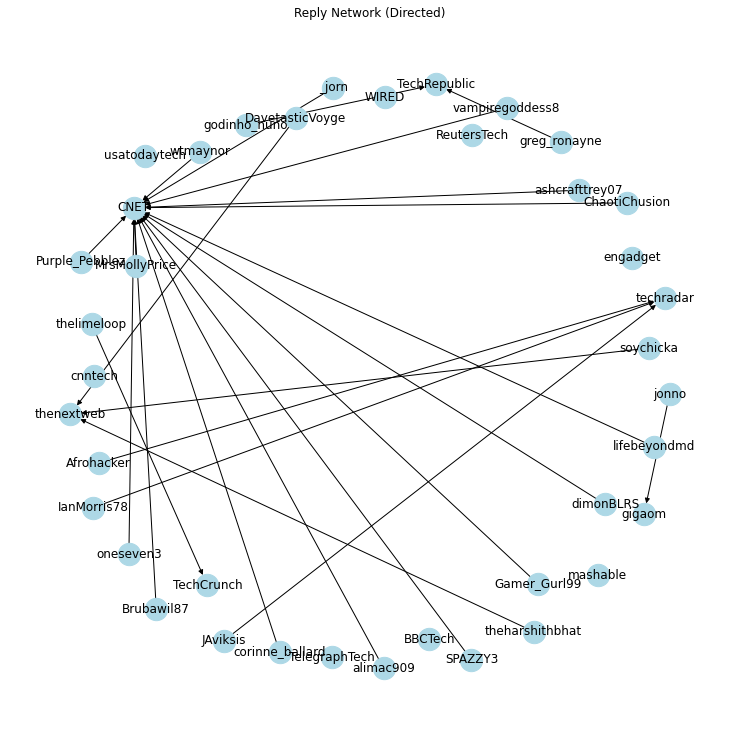

In [19]:
plt.figure(figsize=(13,13)) #create graph 
pos = nx.spring_layout(g2, k = 50)
nx.draw_networkx(g2, pos, with_labels = True, node_size = 500, node_color = "lightblue", label_size = 5)
plt.title("Reply Network (Directed)")
plt.axis("off")
plt.show()

In [20]:
g2.edges(data=True) #print edges with weights 

OutEdgeDataView([('TelegraphTech', 'TelegraphTech', {'weight': 57}), ('ReutersTech', 'ReutersTech', {'weight': 37}), ('jonno', 'gigaom', {'weight': 1}), ('WIRED', 'WIRED', {'weight': 8}), ('soychicka', 'thenextweb', {'weight': 1}), ('techradar', 'techradar', {'weight': 9}), ('corinne_ballard', 'CNET', {'weight': 1}), ('CNET', 'CNET', {'weight': 24}), ('cnntech', 'cnntech', {'weight': 4}), ('Brubawil87', 'CNET', {'weight': 1}), ('SPAZZY3', 'CNET', {'weight': 1}), ('BBCTech', 'BBCTech', {'weight': 6}), ('engadget', 'engadget', {'weight': 2}), ('_jorn', 'CNET', {'weight': 1}), ('mashable', 'mashable', {'weight': 2}), ('DavetasticVoyge', 'thenextweb', {'weight': 1}), ('oneseven3', 'CNET', {'weight': 1}), ('MrsMollyPrice', 'CNET', {'weight': 1}), ('Purple_Pebblez', 'CNET', {'weight': 1}), ('IanMorris78', 'techradar', {'weight': 1}), ('usatodaytech', 'usatodaytech', {'weight': 2}), ('thelimeloop', 'TechCrunch', {'weight': 1}), ('wtmaynor', 'CNET', {'weight': 1}), ('ashcrafttrey07', 'CNET', {

In [21]:
print("Nodes", g2.number_of_nodes()) #number of nodes 
print("Edges", g2.number_of_edges()) #number of edges 
print("Density", nx.density(g2)) #density of the graph 
print("Reciprocity", nx.reciprocity(g2) ) #reciprocity 
print("Strongly Connected?:", nx.is_strongly_connected(g2))
print("Components", nx.number_strongly_connected_components(g2))
print("Is Reply network directed?: ", nx.is_directed(g2)) #checks if the graph is directed 

Nodes 39
Edges 35
Density 0.023616734143049933
Reciprocity 0.0
Strongly Connected?: False
Components 39
Is Reply network directed?:  True


There are 39 nodes and 35 edges in this network. There are less edges compared to the previous directed follower grpah. This is a weighted network. Each edge has a weight which corresponds to the frequncy of the replies from one user to another. From the density, we can see that this isnt a very dense network. The reciprocity here is 0 which indicates that there are no edges with have directions on both ends of it. Again, this is not a strongly connected network and there are 39 components to it. 

In [22]:
in_deg2 = pd.Series(dict(g2.in_degree(weight="weight")), name="w-in-degree")
pd.DataFrame(in_deg2).sort_values(by="w-in-degree", ascending=False).head(10)

,w-in-degree
TelegraphTech,57
CNET,39
ReutersTech,37
techradar,12
WIRED,8
BBCTech,6
cnntech,4
thenextweb,3
TechRepublic,3
usatodaytech,2


We can see from in-degree dataframe that TelegraphTech has the highest in-degree. This indicates that when you add up all of the weights of the edges that are going towards the node TelegraphTech it equals to 57. This is a large number and it indicates that TelegraphTech has recieved the highest number of replies out of all the other users. usatodaytech has the 10th highest and has only recieved 2 replies as indicated from its in-degree weight. 

In [23]:
degree_centrality2 = pd.Series(dict( nx.degree_centrality(g2) ), name="degree_centrality") #gets the degree centrality 
pd.DataFrame(degree_centrality2).sort_values(by="degree_centrality", ascending=False).head(10)

,degree_centrality
CNET,0.447368
techradar,0.131579
thenextweb,0.078947
TelegraphTech,0.052632
mashable,0.052632
usatodaytech,0.052632
WIRED,0.052632
TechRepublic,0.052632
cnntech,0.052632
ReutersTech,0.052632


The above datafram tells us the degree centrality for the nodes. The degree centrality normalises the degree scores by diving by n-1, which is the maximum possible degree in the network. 
**CNET** has the highest degree centrality measure, 0.447368. This indicates that CNET has the highest degree score out of all the other users and it means that CNET is well connected in the network. **techradar** has the second highest degree centrality score which can be seen from the dataframe above. The degree centrality score is a lot lower compared to CNET. 

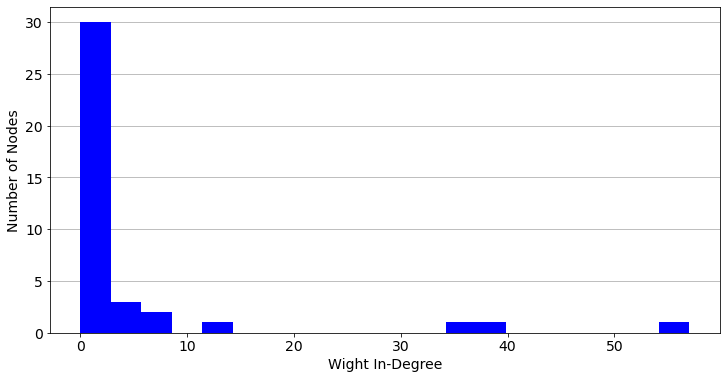

In [24]:
ax2 = in_deg2.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="blue", bins=20, zorder=3)
ax2.yaxis.grid()
ax2.set_ylabel("Number of Nodes", fontsize=14)
ax2.set_xlabel("Wight In-Degree", fontsize=14);

The above histogram shows us the distribution on the in-degree weights for the nodes. We can see that 30 nodes in the network have an in-degree weight betweeen 0 and 10. The majority of the nodes in the network have a weight in-degree between 0 and 10, as the bar for this bin is the highest. There is only one node that has a weight in-degree greater than 50. This is the highest weight in-degree there is in the network. 

## Mention Network : 

In [28]:
g3 = nx.DiGraph() #create directed network 

for i,x in df2.iterrows():
    if [x['entities']['user_mentions']] is not None : #checks if user_mentions in entitites is not None
    #Loop through the user mentions list 
        for y in range(len(x['entities']['user_mentions'])):
            for k in x['entities']['user_mentions'][y]:
                if g3.has_edge(x['user']['screen_name'], x['entities']['user_mentions'][y]['screen_name']): #check if there is an existing edge 
                    g3[x['user']['screen_name']][x['entities']['user_mentions'][y]['screen_name']]['weight']+=1 #if so, add one to weight 
                else:
                    g3.add_edge(x['user']['screen_name'], x['entities']['user_mentions'][y]['screen_name'], weight=1) #if not create edge, with a weight of 1

For this network we are again creating a weighted, directed network. It is similar to the reply network. In twitter, users can mention other users in their own tweets using @ sign. This is a from og interaction on the social media. A single tweet can mention several different accounts as well. Here, the nodes are users, directed edges denote direction of mentions between users, and edge weights correspond to mention frequency.

In [29]:
d3 = nx.to_pandas_edgelist(g3)
d3.sort_values(by='weight', ascending=False).head(10)

,source,target,weight
1057,Gizmodo,Gizmodo,550
732,thenextweb,IndianIdle,435
735,thenextweb,thomas_macaulay,385
230,gigaom,esignoretti,325
232,gigaom,stoweboyd,325
734,thenextweb,mattbeedham,295
733,thenextweb,mrgreene1977,295
757,VentureBeat,Kyle_L_Wiggers,275
736,thenextweb,napilopez,275
235,gigaom,jonno,245


![](mentionsgraph.png)

In [36]:
print("Nodes", g3.number_of_nodes()) #number of nodes 
print("Edges", g3.number_of_edges()) #number of edges 
print("Density", nx.density(g3)) #density of the graph 
print("Reciprocity", nx.reciprocity(g3) ) #reciprocity 
print("Strongly Connected?:", nx.is_strongly_connected(g3))
print("Components", nx.number_strongly_connected_components(g3))
print("Is Mention network directed?: ", nx.is_directed(g3)) #checks if the graph is directed 

Nodes 1271
Edges 1384
Density 0.0008574065928619662
Reciprocity 0.001445086705202312
Strongly Connected?: False
Components 1270
Is Mention network directed?:  True


For this network, there 1271 nodes and 1384 edges. This is a large network. The density for this network is quite low compared to the other networks we have already created. This is a spare network and there arent many connections between the nodes in the network. 
There is reciprocity in the network. This means that there are some edges in the network that go in both direction, meaning that User X and User Y in the network for example, mention each other in their tweets. The reciprocity is quite low though. 
This is not a strongly connected network as there are 1270 components to it, meaning that you cannot reach almost every node from every other node. 

In [37]:
in_deg3 = pd.Series(dict(g3.in_degree(weight="weight")), name="w-in-degree")
pd.DataFrame(in_deg3).sort_values(by="w-in-degree", ascending=False).head(10)

,w-in-degree
Gizmodo,605
IndianIdle,435
thomas_macaulay,385
Kyle_L_Wiggers,335
stoweboyd,325
esignoretti,325
mrgreene1977,295
mattbeedham,295
napilopez,275
deantak,255


The above dataframe illustrates the top 10 users with the highest in-degree weight in the network. It is clear That Gizmodo has the highest in-degree weight. It has a weight of 605. This means that Gizmodo has been mentioned in tweets 605 times.This is by far the highest in-degree weight compared to the other nodes in the network. Gizmodo has also mentioned itself 550 times in tweets. 
IndianIdle has been mentioned in tweets 435 times. This is again very high. It has been mentioned 435 times by the user thenextweb. This again is a high number and shows that IndianIdle must be a popualr and influential node in the twitter dataset as it is being mentioned many times in tweets. It could be that these two nodes, thenextweb and  IndianIdle must have a connection of some sort beacuse of the high number of mentions of IndianIdle in the tweets. 
thenextweb also mentions the user thomas_macaulay many times in their tweets, giving it a high weight for in-degree. 

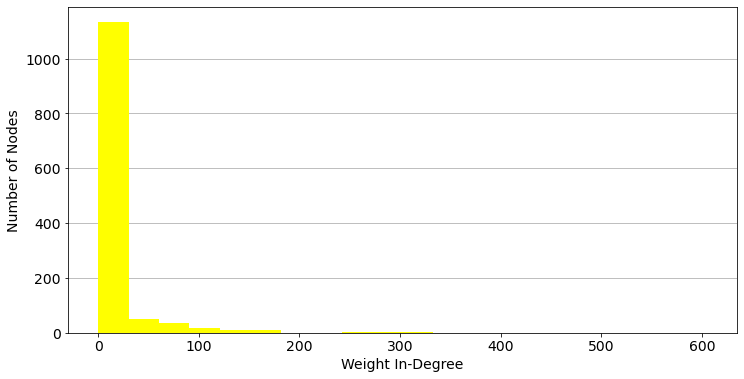

In [38]:
ax3 = in_deg3.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="yellow", bins=20, zorder=3)
ax3.yaxis.grid()
ax3.set_ylabel("Number of Nodes", fontsize=14)
ax3.set_xlabel("Weight In-Degree", fontsize=14);

This histogram displays the weight in-degree distribution. It appears that there are more than 1000 nodes with a weight in-degree of between 0 and 100. The majority of the nodes have an in-degree of between 0 and 100. There are a few nodes with an in-degree of between 100 and 200. As the weight in-degree gets higher, there are less nodes with that weight in-degree, meaning that there are not a lot of nodes with in-degrees greater than 300. 

## User-Hashtag Network 

In [40]:
a = [] #creating the user hashtag pairs 
for i, x in df2.iterrows():
    for y in range(len(x['entities']['hashtags'])):
        user_ = x['user']['name'].casefold()
        hashtags_ = '#' + x['entities']['hashtags'][y]['text'].casefold()
        a.append((user_, hashtags_))
a

[('readwrite', '#microsoft'),
 ('readwrite', '#google'),
 ('gigaom', '#devops'),
 ('gigaom', '#devsecops'),
 ('gigaom', '#softwaredevelopment'),
 ('gigaom', '#devops'),
 ('gigaom', '#cicd'),
 ('gigaom', '#value'),
 ('gigaom', '#datacenters'),
 ('gigaom', '#cpu'),
 ('gigaom', '#gpu'),
 ('gigaom', '#datastorage'),
 ('gigaom', '#nvmeof'),
 ('readwrite', '#technology'),
 ('readwrite', '#blackfriday'),
 ('usa today tech', '#iphone12pro'),
 ('telegraph technology intelligence', '#techintel20'),
 ('gigaom', '#devops'),
 ('gigaom', '#softwaredevelopment'),
 ('gigaom', '#technology'),
 ('gigaom', '#development'),
 ('gigaom', '#operations'),
 ('telegraph technology intelligence', '#blackfriday'),
 ('gigaom', '#datawarehouse'),
 ('gigaom', '#datatransformation'),
 ('gigaom', '#digitaltransformation'),
 ('gigaom', '#network'),
 ('gigaom', '#naas'),
 ('readwrite', '#remotework'),
 ('readwrite', '#pandemic'),
 ('readwrite', '#branding'),
 ('telegraph technology intelligence', '#techintel20'),
 ('rea

In [41]:
g4=nx.Graph() #creating the bipartite graph
user_nodes, hashtag_nodes = set(), set()
counts = Counter()

for p in a:
    user = p[0]
    hashtag = p[1]    
    pair = frozenset([user,hashtag])
    counts[pair] += 1

    if not user in user_nodes: #makes the user and hashtag nodes 
        g4.add_node(user, bipartite=0)
        user_nodes.add(user)
    if not hashtag in hashtag_nodes:
        g4.add_node(hashtag, bipartite=1)
        hashtag_nodes.add(hashtag)    
    
    for p in counts: #creating the edges
        pair = list(p)
        user, hashtag = pair[0], pair[1]
        g4.add_edge(user,hashtag, weight=counts[p])

In twitter, the hashtag symbol is a label used that makes it easier to find information with a theme or specific content. Here, we are creating a bipartite user-hashtag network. One set of nodes corresponds to the users names and the other set corresponds to the hashtags which appear in those users' tweets. By analysing the hashtags appearing in a user's tweets, we can identify the topics on which they frequently post about. We create a weighted user-hashtag network from a collection of tweets. A user can put a few hastags in one post. We also have to check if there is already an edge that exists between the user and the hashtag, we would then just increment the weight by one, otherwise we create a new edge and make the weight equal to 1. 

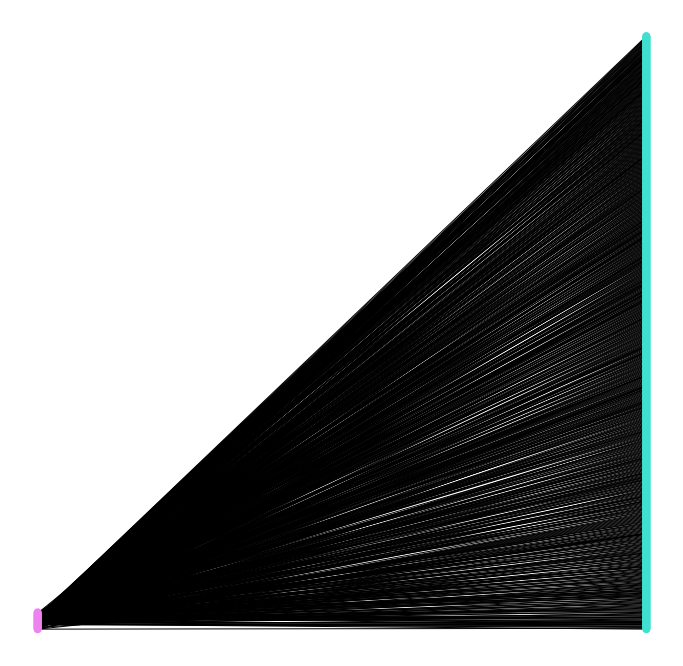

In [42]:
# manually set the node colours and positions
color_map, pos = {}, {}
for i, node in enumerate(user_nodes):
    pos[node] = (0, i*10)
    color_map[node] = "violet"
for i, node in enumerate(hashtag_nodes):
    pos[node] = (1, i*10)
    color_map[node] = "turquoise"
colors = [color_map[node] for node in g4.nodes()]
# draw the network    
plt.figure(figsize=(12,12))
nx.draw_networkx(g4, pos=pos, with_labels=False, 
        node_size = 50,
        font_size = 9,
        node_color = colors)
plt.axis("off")
plt.show()

In [43]:
print("Nodes", g4.number_of_nodes()) #number of nodes 
print("Edges", g4.number_of_edges()) #number of edges 
print("Density", nx.density(g4)) #density of the graph 
print("Connected?:", nx.is_connected(g4))
print("Components", nx.number_connected_components(g4))
print("Is User-Hashtag network bipartite?: ", nx.is_bipartite(g4)) #checks if the graph is directed 
print("Is User-Hashtag network directed?: ", nx.is_directed(g4)) #checks if the graph is directed 

Nodes 730
Edges 789
Density 0.002965217881504031
Connected?: False
Components 4
Is User-Hashtag network bipartite?:  True
Is User-Hashtag network directed?:  False


There are 730 nodes and 789 edges in the network. The density for this network is quite low indicating that this is a sparse network again. 
This again is not a connected network and there are 4 componenets in it. This indicates that you cannot reach almost every node from every other node in the network. 
This is a bipartite network as it is a network where the vertices, V, can be divided into two independent sets, V1 and V2, and every edge of the graph connects one vertex in V1 to one vertex in V2. It aslo returns true when we check if it is a bipartite graph. 
This is an undirected graph as there is no need to show the direction in which the edge goes. We know that this network is needed to represent the number of times a user uses a hashtag in their posts.  

In [44]:
d4 = nx.to_pandas_edgelist(g4)
d4.sort_values(by='weight', ascending=False).head(10)

,source,target,weight
2,readwrite,#technology,111
281,gigaom,#devops,60
311,gigaom,#cloud,48
350,gigaom,#ai,43
637,telegraph technology intelligence,#techintel20,42
21,readwrite,#apple,36
641,telegraph technology intelligence,#ti100,31
328,gigaom,#datamanagement,28
301,gigaom,#kubernetes,27
289,gigaom,#datastorage,26


This displays the source and the target and tells us the weight between these two nodes. The weight tells us the number of times there has been an edge between the target and the source node. We can see from the dataframe that the highest weight is 111, going from readwrite to the hastag technology. This means that the user readwrite used the #technology 111 times in their tweets. The 10th highest weight is 26, where there is an edge between gigaom to #datastorage. Only 26 times did the user gigaom use the #datastorage in their tweets. This gives us an insight into what kind of posts does the user post about on twitter. 

In [45]:
hashtag_weight = dict(g4.degree(hashtag_nodes, weight="weight"))
# convert to a Pandas series and sort it
hashtag_weight = pd.Series(hashtag_weight, name="weight")
hashtag_weight = hashtag_weight.sort_values(ascending=False)
# display the top 10
pd.DataFrame(hashtag_weight.head(10))

,weight
#technology,121
#devops,60
#ai,52
#cloud,48
#techintel20,42
#apple,39
#ti100,31
#ces2021,30
#datamanagement,28
#cybersecurity,27


The above dataframe represents the weights for the top 10 hastags. We can see that the technology hashtag was used the most often in tweets. it was used 121 times in tweets by users. The 10th highest weight for the hastags is cybersecurity whihc was used only 27 times in tweets by users. It is obvious that technology is the most common hashtag that users use in their twitter posts. 

In [46]:
user_weight = dict(g4.degree(user_nodes, weight="weight"))
# convert to a Pandas series and sort it
user_weight = pd.Series(user_weight, name="weight")
user_weight = user_weight.sort_values(ascending=False)
# display the top 10
pd.DataFrame(user_weight.head(10))

,weight
gigaom,1249
readwrite,745
telegraph technology intelligence,135
techrepublic,66
ars technica,62
cnet,43
wired,43
usa today tech,21
techradar,20
bbc news technology,18


This dataframe indicates the number of times a user uses hastags in their tweets. the user gigaom has used 1249 hashtags in their tweets, while bbc news technology has used only 18 hastags in the posts that they tweet on twitter. it is clear that gigaom has the highest weight for the number of hashtags used in posts on twitter out of all of the other users. The hastags help other people find certain topics or information easier. 

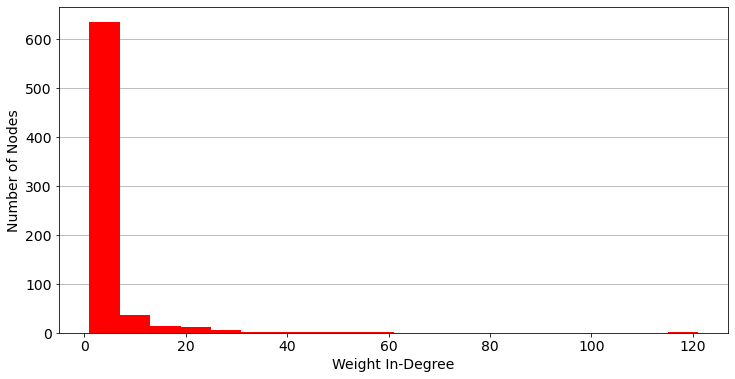

In [47]:
ax4 = hashtag_weight.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="red", bins=20, zorder=3)
ax4.yaxis.grid()
ax4.set_ylabel("Number of Nodes", fontsize=14)
ax4.set_xlabel("Weight In-Degree", fontsize=14);

The above histogram displays the weight distributions of the hashtag nodes in the network. it is clear from the histogram that more than 600 hashtag nodes in the network have a weight in the 0 to 20 bin. This means that more that 600 hshtag nodes have been used from 0-20 times in a twittr post by a user. We can see that the hgihesst weight is around 120, whihc indicates that a hashtag was used around 120 times in twitter posts by different users. The majoirty of the hashtag nodes in the network have a weight from 0-20. This means that users in the network have used certain hashtags 0-20 times in their twitter posts. 

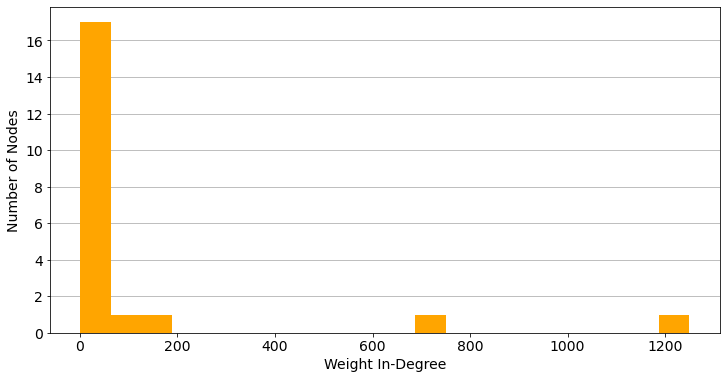

In [48]:
ax5 = user_weight.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="orange", bins=20, zorder=3)
ax5.yaxis.grid()
ax5.set_ylabel("Number of Nodes", fontsize=14)
ax5.set_xlabel("Weight In-Degree", fontsize=14);

This indicates the number of times users have used hashtags in their posts. We can see more that 17 users have used hashtags 0-200 times in their tweets. only one user has used hastags more that 1200 times in their tweets. The majority of users have only used hashtags 0-200 times in their posts online. 

## Hashtag Co-occurrence Network :

In [49]:
g5 = nx.Graph()
for i,x in df2.iterrows():
    if len(x['entities']['hashtags']) > 1:
        for i in range(len(x['entities']['hashtags'])):
            for j in range(i+1, len(x['entities']['hashtags'])):
                if g5.has_edge(x['entities']['hashtags'][i]['text'].lower(), x['entities']['hashtags'][j]['text'].lower()):
                    g5[x['entities']['hashtags'][i]['text'].lower()][x['entities']['hashtags'][j]['text'].lower()]['weight'] = g5[x['entities']['hashtags'][i]['text'].lower()][x['entities']['hashtags'][j]['text'].lower()]['weight']+1
                else:
                    g5.add_edge(x['entities']['hashtags'][i]['text'].lower(), x['entities']['hashtags'][j]['text'].lower(), weight=1)

For this network, we are creating a network that shows us the number of times pairs of hashtags have appeared in the same tweet. This could give us an indication of pairs of hashtags which are semantically related. This hashtag co-occurrence network is going to be a weight unidirected network, where the hashtags are represented by nodes. An edge will exist between pairs of hashtags if they appear together in the same tweet at least once.

In [50]:
df5 = nx.to_pandas_edgelist(g5)
df5.sort_values(by="weight",ascending=False).head(10)

,source,target,weight
807,ai,aiops,19
33,devops,softwaredevelopment,17
41,devops,valuestreammanagement,14
32,devops,devsecops,14
45,devops,vsm,14
363,k8s,kubernetes,13
812,ai,ml,11
814,ai,machinelearning,11
600,automation,ai,9
874,valuestreammanagement,vsm,9


The above dataframe displays the weight of when pairs of hashtags are used at the same time in a tweet. We can see that the highest weight is 19, indicated that the hashtags ai and aiops, were used 19 times together in a tweet. the 10th highest is 9, for the hastags valuestreammanagement and vsm. These two hastags were used 9 times together in twitter posts. 

![](co-occurrence.png)

In [51]:
print("Nodes", g5.number_of_nodes()) #number of nodes 
print("Edges", g5.number_of_edges()) #number of edges 
print("Density", nx.density(g5)) #density of the graph 
print("Connected?:", nx.is_connected(g5))
print("Components", nx.number_connected_components(g5))
print("Is Follower network directed?: ", nx.is_directed(g5)) #checks if the graph is directed 

Nodes 569
Edges 1355
Density 0.00838510854229065
Connected?: False
Components 46
Is Follower network directed?:  False


The number of nodes in the network is 569 and the number of edges are 1355. This is a big network. We can see that the density for this network is quite sparse. This network is not connected and there are 46 componenets to it. 

In [57]:
deg5 = dict(g5.degree(weight = "weight"))
df5 = pd.DataFrame(deg5.items(), columns=['Hashtag', 'Network Degree'])

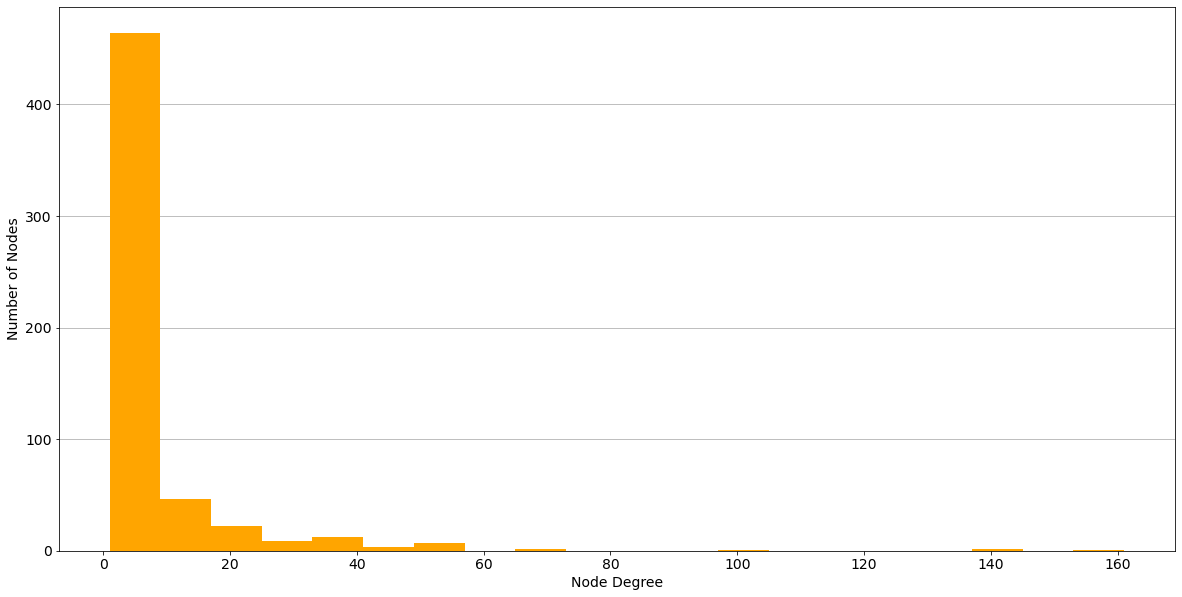

In [58]:
ax5 = df5.plot.hist(figsize=(20,10), fontsize=14, legend=None, color="orange", bins=20, zorder=3)
ax5.yaxis.grid()
ax5.set_ylabel("Number of Nodes", fontsize=14)
ax5.set_xlabel("Node Degree", fontsize=14);

This histogram represets the node-degree for the hashtag nodes. The majority of the node-degrees range from 0-20. After 20, the node degrees begin to decrease. 

In [52]:
ego_node = "microsoft"
eg = nx.ego_graph(g5, ego_node)
eg.number_of_nodes(), eg.number_of_edges()

(21, 72)

Creating an ego-network with an microsoft as the ego-node.  There are 21 nodes and 72 edges in the network. 

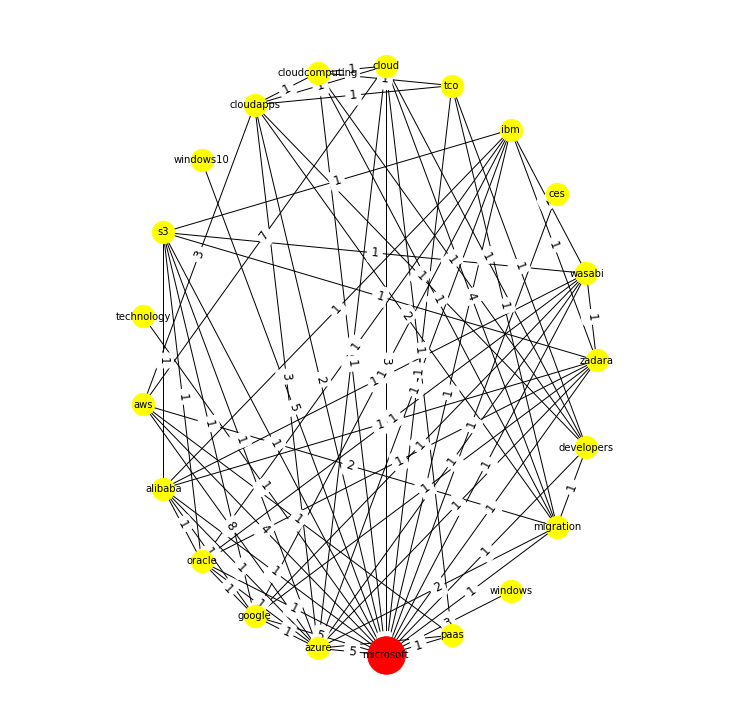

In [53]:
plt.figure(figsize=(13, 13)) 
plt.margins(0.3, 0.1)
pos = nx.circular_layout(eg)
# draw the nodes and edges
nx.draw(eg, pos, with_labels = True, node_size=500, font_size=10, node_color="yellow")
# now add the edge weights as labels
labels = nx.get_edge_attributes(eg, 'weight')
nx.draw_networkx_edge_labels(eg, pos,edge_labels=labels, font_size=12)
# add the ego node in a different colour
nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], node_size=1400, node_color="red");

i picked mircrosoft as my ego-node has this hastag was used many times wiht other hastags in tweets. The above graph gives us a detailed insight into whihc nodes the node microsoft is connected to. It aslo diplays the edge weights as well for each of the edges, whihc tells us the number of times a hastag in yellow appeared with microsoft in red in a tweet. 